# Laboratorio Recuperativo: Redes Neuronales

Integrantes: Adolfo Ignacio Rojas Valenzuela (sección 2), Emilia Chávez Salamanca (sección 1)

# Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifiquen este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. Cuando finalicen el laboratorio, **generen un archivo HTML** usando jupyter (ver tutorial 3) y súbanlo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

In [1]:
# pip install scipy scikit-learn numpy pandas torch

# **Redes Neuronales con Scikit-learn**

**Objetivo**

En este laboratorio, trabajarán con el dataset Fashion-MNIST para entrenar y evaluar modelos de redes neuronales usando tanto scikit-learn como PyTorch. Aprenderán a explorar datos, entrenar modelos, y analizar sus resultados.

Primero preparamos el dataset y vemos cómo se ven las imágenes.

El dataset tiene 5000 ejemplos y 784 características
El dataset tiene 10 clases: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


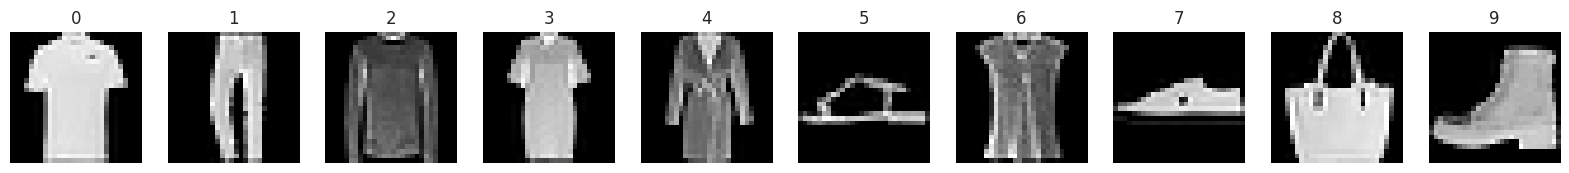

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

sns.set_theme()

# Cargar el dataset Fashion-MNIST
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

# El dataset es muy grande por lo que tomamos solo una muestra
np.random.seed(42)
idx = np.random.choice(len(X), 5000, replace=False)
X = X[idx]
y = y[idx]

n_features = X.shape[1]
n_classes = len(np.unique(y))
print(f"El dataset tiene {X.shape[0]} ejemplos y {n_features} características")
print(f"El dataset tiene {n_classes} clases: {np.unique(y)}")

unique_labels = np.unique(y)


# Normalizar los datos
X = X / 255.0  # Normalizar
y = y.astype(int)  # Asegurar que las etiquetas son enteros

# Dividir el dataset en entrenamiento (70%), validación (15%) y test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Mostramos un ejemplo por cada clase
fig, axes = plt.subplots(1, len(unique_labels), figsize=(20, 20))
for i, label in enumerate(unique_labels):
    axes[i].imshow(X_train[y_train == i][0].reshape(28, 28), cmap="gray")
    axes[i].set_title(label)
    axes[i].axis("off")
plt.show()

### **Entrenamiento de un MLP con scikit-learn**

**Pregunta 1**

Crea 2 MLPs con sklearn con los siguientes parámetros:

El primero debe tener:
- 3 capas ocultas de 32, 16 y 16 neuronas respectivamente.
- Función de activación ReLU.
- El modelo debe tener un máximo de 300 iteraciones.

y debes guardarlo en la variable `mlp1`.

El segundo debe tener:
- 3 capas ocultas de 64, 32 y 16 neuronas respectivamente.
- Función de activación ReLU.
- El modelo debe tener un máximo de 300 iteraciones.

y debes guardarlo en la variable `mlp2`.

**Recuerda setear un random_state para que los resultados sean reproducibles.**

In [3]:
# Random state seed
rs = 42

In [4]:
from sklearn.neural_network import MLPClassifier

mlp1 = MLPClassifier(
    hidden_layer_sizes=(32, 16, 16),
    activation='relu',
    max_iter=300,
    random_state=rs
)

mlp2 = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    max_iter=300,
    random_state=rs
)

**Pregunta 2**

Para cada modelo

- Entrena el MLP
- Evalúa su desempeño en el conjunto de validación mostrando el accuracy.
- Contestar las siguientes preguntas: ¿Qué modelo tiene mejor desempeño en accuracy? ¿A qué crees que se debe esto?
- Crea una variable llamada mlp_best y guarda en ella el mejor modelo.

In [5]:
from sklearn.metrics import classification_report

redes = {
    "MLP1": mlp1,
    "MLP2": mlp2
}

for nombre, red in redes.items():
    red.fit(X_train, y_train)
    
    # Evaluar en el conjunto de validación
    y_pred = red.predict(X_val)

    display(Markdown(f"Métricas de performance en el conjunto de validación para {nombre}:"))
    print(classification_report(y_val, y_pred, digits=4))
    display(Markdown(f"----"))

/home/cc5205-labs/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Métricas de performance en el conjunto de validación para MLP1:

              precision    recall  f1-score   support

           0     0.8143    0.7125    0.7600        80
           1     0.9036    0.9615    0.9317        78
           2     0.7200    0.7500    0.7347        72
           3     0.8049    0.8148    0.8098        81
           4     0.7051    0.7143    0.7097        77
           5     0.9189    0.8193    0.8662        83
           6     0.6125    0.6203    0.6164        79
           7     0.8615    0.9333    0.8960        60
           8     0.9265    0.9545    0.9403        66
           9     0.9200    0.9324    0.9262        74

    accuracy                         0.8160       750
   macro avg     0.8187    0.8213    0.8191       750
weighted avg     0.8167    0.8160    0.8154       750



----

Métricas de performance en el conjunto de validación para MLP2:

              precision    recall  f1-score   support

           0     0.8056    0.7250    0.7632        80
           1     0.9740    0.9615    0.9677        78
           2     0.6786    0.7917    0.7308        72
           3     0.8052    0.7654    0.7848        81
           4     0.6875    0.7143    0.7006        77
           5     0.9733    0.8795    0.9241        83
           6     0.6538    0.6456    0.6497        79
           7     0.9062    0.9667    0.9355        60
           8     0.9701    0.9848    0.9774        66
           9     0.9211    0.9459    0.9333        74

    accuracy                         0.8320       750
   macro avg     0.8375    0.8380    0.8367       750
weighted avg     0.8352    0.8320    0.8325       750



----

**Respuesta:** Nuestro mlp con mejor desempeño es el 2do, esto se puede explicar por la cantidad de epochs/iterations bajo el óptimo y la complejidad extra que tiene mlp2 en comparación con mlp1 (mlp2 es más "profunda" lo que si bien escala mal con la cantidad de parámetros entrenables y riesgo de overfitting, al menos permite que el modelo se ajuste mejor a los datos de entrenamiento en caso de tener patrones complejos y converja más rápido para el caso de epochs sub óptimas)

In [6]:
mlp_best = mlp2

**Pregunta 3**

Para el mejor modelo encontrado en la pregunta anterior (el guardado en la variable `mlp_best`)

- Muestra la matriz de confusión para el conjunto de validación
- Constete: ¿Qué clase se confunden más entre sí? ¿Por qué crees que ocurre esto? Relacionalo con los productos de cada clase que viste anteriormente (mostrado al cargar los datos).

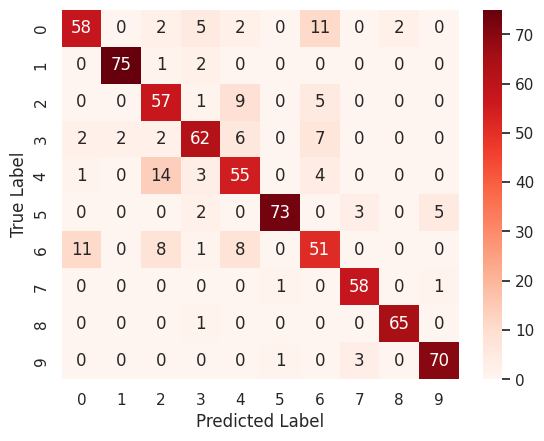

Cantidad de errores: 126

In [7]:
import plotly.express as px
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_label, pred_label, design=0):
    mat = confusion_matrix(true_label, pred_label)

    if design == 1:
        hmap = px.imshow(
            mat,
            title="Matríz de Confusión",
            text_auto=".0f",
            labels={"x": "Predicted Label", "y": "True Label", "color": "Cantidad"},
            color_continuous_scale="Reds"
        )
    
        hmap.show()
        
    else:
        fig, ax = plt.subplots()

        ax = sns.heatmap(mat, annot=True, cmap='Reds')
        ax.set_ylabel("True Label")
        ax.set_xlabel("Predicted Label")
    
        plt.show()

y_pred_best = mlp_best.predict(X_val)
plot_confusion_matrix(y_val, y_pred_best)

errors = X_val[y_val != y_pred_best]
errors_labels = y_pred_best[y_val != y_pred_best]

display(Markdown(f"Cantidad de errores: {errors.shape[0]}"))

**Respuesta**: La mayoría de las confusiones ocurren entre prendas del tren superior, en particular entre los pares {polera (0), camisa (6)}, {camisa (6), polerón/polera manga larga (2)}, {camisa (6), abrigo (4)}, {abrigo (4), polerón (2)}, {vestido (3), abrigo (4)}, entre otros. Esto tiene sentido, ya que las prendas del tren inferior (como pantalones) y los accesorios (como bolsos y calzado) son visualmente más distinguibles, mientras que las prendas del tren superior comparten varias características visuales como el largo de las mangas, forma general y tonalidades. Dada la baja resolución de las imágenes (muy pocos pixeles/datos), es difícil obtener descriptores lo suficientemente robustos para diferenciar entre prendas similares. es dificil que este tipo de red neuronal simple logre mejor desempeño

### **Entrenamiento de un MLP con PyTorch**

In [8]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

**Pregunta 4**

Convierta los datos al formato de PyTorch para usar los DataLoader

- Transforme los splits de train, val y test a tensores de PyTorch
- Cree Datasets de PyTorch con los tensores creados
- Cree DataLoaders de PyTorch con los Datasets creados con un batch_size de 64

In [9]:
# Transformar a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Crear Datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Crear DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

**Pregunta 5**

Crea un modelo de MLP con PyTorch con la siguiente arquitectura:

- 1 capa ocultas de 64 neuronas respectivamente.
- Función de activación ReLU.

**Recuerda setear un random_state para que los resultados sean reproducibles.**

**Hint**: Recuerda que la dimensión de input depende de la cantidad de features que tienes, y la dimensión de output depende de la cantidad de clases que tienes.

In [10]:
# Random state pytorch seed
torch.manual_seed(rs)

In [11]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        # hidden layer
        self.hl = nn.Linear(input_dim, hidden_dim)
        # output layer
        self.ol = nn.Linear(hidden_dim, output_dim)

        self.relu = nn.ReLU()

    def forward(self, x):
        z = self.relu(self.hl(x))
        y = self.ol(z)
        return y

La siguiente función no debes modificarla, la tendrás que usar en la siguiente pregunta.

In [12]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs, device='cpu'):
    """
    Función general para entrenar modelos en PyTorch, con seguimiento de pérdidas y métricas.

    Args:
        model: Modelo de PyTorch a entrenar.
        train_loader: DataLoader para los datos de entrenamiento.
        val_loader: DataLoader para los datos de validación.
        criterion: Función de pérdida.
        optimizer: Optimizador para el modelo.
        epochs: Número de épocas a entrenar.
        device: CPU o GPU.

    Returns:
        metrics: Diccionario con las pérdidas y métricas de validación.
    """
    model.to(device)
    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        # Modo de entrenamiento
        model.train()
        total_train_loss = 0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        # Promediar la pérdida de entrenamiento
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Modo de evaluación
        model.eval()
        total_val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for X_val_batch, y_val_batch in val_loader:
                X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
                val_outputs = model(X_val_batch)
                val_loss = criterion(val_outputs, y_val_batch)
                total_val_loss += val_loss.item()

                _, predicted = torch.max(val_outputs, 1)
                correct += (predicted == y_val_batch).sum().item()
                total += y_val_batch.size(0)

        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        val_accuracy = correct / total
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Graficar las pérdidas
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs+1), val_losses, label='Validation Loss', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Evolution During Training')
    plt.legend()
    plt.grid()
    plt.show()

    return {'train_loss': train_losses, 'val_loss': val_losses, 'val_accuracy': val_accuracies}

**Pregunta 6**

Primero, guarda el modelo creado en la variable `mlp_torch`.

Usa la función `train_model` para entrenar tu modelo con los siguientes parámetros:

- `model`: tu modelo de MLP de PyTorch
- `train_loader`: tu DataLoader de entrenamiento
- `val_loader`: tu DataLoader de validación
- `criterion` (la función de pérdida): Usa `nn.CrossEntropyLoss()`
- `optimizer` (el optimizador): : Usa `optim.Adam(mlp_torch.parameters(), lr=0.001)`
- `epochs`: 30

y contesta: ¿por qué la loss de entrenamiento es menor que la loss de validación?

Epoch 1/30, Training Loss: 1.3349, Validation Loss: 0.9053, Validation Accuracy: 0.6800
Epoch 2/30, Training Loss: 0.7453, Validation Loss: 0.7586, Validation Accuracy: 0.7267
Epoch 3/30, Training Loss: 0.6333, Validation Loss: 0.6728, Validation Accuracy: 0.7520
Epoch 4/30, Training Loss: 0.5654, Validation Loss: 0.6098, Validation Accuracy: 0.7827
Epoch 5/30, Training Loss: 0.5190, Validation Loss: 0.5998, Validation Accuracy: 0.7920
Epoch 6/30, Training Loss: 0.4960, Validation Loss: 0.5769, Validation Accuracy: 0.7933
Epoch 7/30, Training Loss: 0.4630, Validation Loss: 0.5347, Validation Accuracy: 0.8093
Epoch 8/30, Training Loss: 0.4381, Validation Loss: 0.5293, Validation Accuracy: 0.8093
Epoch 9/30, Training Loss: 0.4231, Validation Loss: 0.5213, Validation Accuracy: 0.8173
Epoch 10/30, Training Loss: 0.4077, Validation Loss: 0.5057, Validation Accuracy: 0.8253
Epoch 11/30, Training Loss: 0.4014, Validation Loss: 0.5114, Validation Accuracy: 0.8187
Epoch 12/30, Training Loss: 0.

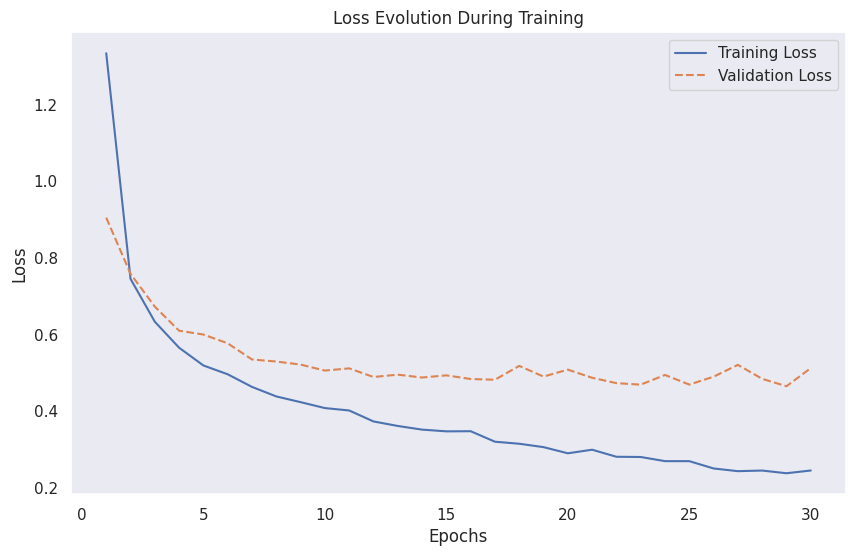

In [14]:
mlp_torch = MLP(input_dim=n_features, hidden_dim=64, output_dim=n_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_torch.parameters(), lr=0.001)

metrics_mlp = train_model(
    model=mlp_torch,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    epochs=30
)

**Respuesta**: Porque nuestro modelo se entrena directamente sobre el conjunto de entrenamiento, ajustando sus parámetros para minimizar la loss function en ese conjunto (este toma el train_loader como ground truth)

La siguiente función no debes modificarla, la tendrás que usar en la siguiente pregunta.

In [15]:
# Evaluar el modelo en el conjunto de prueba
def evaluate_model(model, data_loader, criterion, device='cpu'):
    model.eval()
    model.to(device)
    data_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            data_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

    accuracy = correct / total
    print(f"Data Accuracy: {accuracy:.4f}")

    avg_loss = data_loss / len(data_loader)
    print(f"Data Loss: {avg_loss:.4f}")

    return {'loss': avg_loss, 'accuracy': accuracy}

**Pregunta 7**

Usa la función `evaluate_model` para evaluar tu modelo en los conjuntos de entrenamiento, validación y test.

Muestra la loss y el accuracy para cada conjunto y contesta: ¿Qué conjunto tiene el mejor desempeño? ¿Por qué crees que es así?

La función recibe los siguientes parámetros:

- `model`: tu modelo de MLP de PyTorch
- `data_loader`: el dataloader de los datos que quieres evaluar
- `criterion` (la función de pérdida): Usa `nn.CrossEntropyLoss()`

y retorna la loss y el accuracy.

In [20]:
criterion = nn.CrossEntropyLoss()

conjuntos = {
    "entrenamiento": train_loader,
    "validación": val_loader,
    "test": test_loader
}

for nombre, conjunto in conjuntos.items():
    display(Markdown(f"Evaluación del MLP con el set de {nombre}:"))
    evaluate_model(mlp_torch, conjunto, criterion)
    display(Markdown(f"----"))

Evaluación del MLP con el set de entrenamiento:

Data Accuracy: 0.9211
Data Loss: 0.2327


----

Evaluación del MLP con el set de validación:

Data Accuracy: 0.8187
Data Loss: 0.5122


----

Evaluación del MLP con el set de test:

Data Accuracy: 0.8200
Data Loss: 0.5260


----

**Respuesta**: Como el modelo desconoce los sets de validación y testeo (como mencionamos previamente, la optimización se hace respecto a la loss function usando al conjunto de entrenamiento como referencia) es intuitivo que evaluando con el train_loader se obtendrá el mejor desempeño 